# Biblioteca NetworkX

## Instalando e importando

In [2]:
# Instalando a biblioteca networkx
!pip install networkx

In [3]:
# Importando a biblioteca networkx
import networkx as nx

## Criando o grafo e adicionando vértices

In [4]:
# Criando um objeto grafo
# No caso, estamos criando um grafo vazio
G = nx.Graph()

In [5]:
# Adicionando vértices de maneira simples ao nosso grafo
G.add_node(1)
G.add_nodes_from([2,3])

In [6]:
# Adicionando vértices com características no nosso grafo
G.add_nodes_from([
    (4, {"cor": "vermelho"}),
    (5, {"cor": "verde"}),
])

In [7]:
# Vendo os nós do nosso grafo
G.nodes

NodeView((1, 2, 3, 4, 5))

In [8]:
# Transportando os vértices de um grafo para o outro
H = nx.Graph()
H.add_nodes_from([6,7])
G.add_nodes_from(H)
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7))

In [9]:
# Inclusive, grafos podem ser usados como nós de outros grafos
G.add_node(H)

In [10]:
# Adicionando um nó com nome "spam"
G.add_node("spam")

In [11]:
# Adicionando os nós "s", "p", "a" e "m"
G.add_nodes_from("spam")

In [12]:
# Vendo os nós
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, <networkx.classes.graph.Graph object at 0x7f45ed496190>, 'spam', 's', 'p', 'a', 'm'))

## Arestas

In [13]:
# Adicionando arestas aos nossos vértices
G.add_edge(1,2)

In [14]:
# Adicionando tupla como aresta, é necessário desempacotá-la antes de adicionar
e = (2,3)
G.add_edge(*e)

In [15]:
# Vendo as arestas
G.edges

EdgeView([(1, 2), (2, 3)])

In [16]:
# Adicionando arestas através de uma lista
G.add_edges_from([(4,7),(5,7)])

In [17]:
# Também podemos adicionar as arestas de um outro grafo
H.add_edge(6,7)
G.add_edges_from(H.edges)
G.edges

EdgeView([(1, 2), (2, 3), (4, 7), (5, 7), (6, 7)])

In [18]:
# "Esvaziando" o nosso grafo
G.clear()

In [19]:
# O conjunto de nós funciona exatamente como um set, não permitindo repetições
G.add_nodes_from([1,2])
G.add_node(1)
G.nodes

NodeView((1, 2))

## Número de vértices e arestas

In [20]:
G.number_of_nodes()

2

In [21]:
G.number_of_edges()

0

## Examinando elementos do grafo

In [22]:
# Construindo um novo grafo G
G.clear()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)])

In [23]:
# Lista de vértices
list(G.nodes)

[1, 2, 3, 4, 5, 6]

In [24]:
# Lista de arestas
list(G.edges)

[(1, 2), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6)]

In [25]:
# Lista de vizinhos de um vértice
list(G.adj[1])

[2, 6]

In [26]:
# Vendo o grau de um vértice
G.degree[1]

2

In [27]:
# Vendo as arestas de um conjunto de vértices
list(G.edges([2, 5]))

[(2, 1), (2, 3), (5, 4), (5, 6)]

In [28]:
# Vendo o grau de um conjunto de vértices
dict(G.degree([2, 5]))

{2: 2, 5: 2}

## Removendo elementos

In [29]:
# Removendo alguns dos vértices do nosso grafo
G.remove_node(2)
list(G.nodes)

[1, 3, 4, 5, 6]

In [30]:
# Vendo como fica o conjunto de arestas após a remoção de um nó
list(G.edges)

[(1, 6), (3, 4), (4, 5), (5, 6)]

In [31]:
# Removendo um conjunto de vértices
G.remove_nodes_from([4,5])
list(G.nodes)

[1, 3, 6]

In [32]:
# Removendo uma aresta
G.remove_edge(1,6)
list(G.edges)

[]

## Adicionando atributos a grafos, vértices e arestas

In [33]:
# Vamos criar um grafo com um atributo dia da semana, para ver os atributos usamos o atributo graph
G = nx.Graph(dia="segunda")
G.graph

{'dia': 'segunda'}

In [34]:
# Para alterar o valor de um atributo
G.graph['dia'] = "sexta"
G.graph

{'dia': 'sexta'}

In [35]:
# Criando vértices com atributos 
G.add_node(1, profissao = "professor", amigos = 23)
G.nodes[1]

{'profissao': 'professor', 'amigos': 23}

In [36]:
# Adicionando atributo a vértice existente
G.nodes[1]["empregado"] = 1
G.nodes[1]

{'profissao': 'professor', 'amigos': 23, 'empregado': 1}

In [37]:
# Adicionando vários vértice com atributos
G.add_nodes_from([(2,{"cor":"vermelho","peso":3}),(3,{"cor":"azul","peso":9})])
print(G.nodes[2])
print(G.nodes[3])

{'cor': 'vermelho', 'peso': 3}
{'cor': 'azul', 'peso': 9}


In [38]:
# Adicionando arestas com atributos
G.add_edge(1,2,peso=4,valor=10)
print(G.edges[(1,2)])

{'peso': 4, 'valor': 10}


In [39]:
# Adicionando várias arestas com atributos
G.add_edges_from([(2,3,{"peso":4.5,"valor":15}), (3,1,{"peso":1,"valor":50})])
print(G.edges[(2,3)])
print(G.edges[(3,1)])

{'peso': 4.5, 'valor': 15}
{'peso': 1, 'valor': 50}


Para as arestas existe um atributo especial, o "weight", esse atributo deve ser numérico, pois é usado por algoritmos que usam aresta ponderadas.

##  Algumas funções geradoras de grafos

In [40]:
# Grafo de petersen
G = nx.petersen_graph()
print(G)

Graph named 'Petersen Graph' with 10 nodes and 15 edges


In [41]:
# Grafo de Tutte
G = nx.tutte_graph()
print(G)

Graph named "Tutte's Graph" with 46 nodes and 69 edges


In [42]:
# Grafo completo
G = nx.complete_graph(6)
print(G)

Graph with 6 nodes and 15 edges


In [43]:
# Grafo bipartido completo
G = nx.complete_bipartite_graph(3, 3)
print(G)

Graph named 'complete_bipartite_graph(3,3)' with 6 nodes and 9 edges


In [44]:
# Grafo de Barbell
G = nx.barbell_graph(5, 2)
print(G)

Graph with 12 nodes and 23 edges


In [45]:
# Grafo ciclo
G = nx.cycle_graph(6)
print(G)

Graph with 6 nodes and 6 edges


In [46]:
# Grafo vazio
G = nx.empty_graph(5)
print(G)

Graph with 5 nodes and 0 edges


In [47]:
# Grafo caminho
G = nx.path_graph(6)
print(G)

Graph with 6 nodes and 5 edges


In [49]:
# Grafo estrela
G = nx.star_graph(7)
print(G)

Graph with 8 nodes and 7 edges


In [51]:
# Grafo roda
G = nx.wheel_graph(5)
print(G)

Graph with 5 nodes and 8 edges


Link com todos os generators de grafos: [LINK](https://networkx.org/documentation/stable/reference/generated/networkx.generators.trees.random_tree.html)

## Operações sobre grafos

In [71]:
# Definindo grafos que serão usados
G = nx.star_graph(5)
H = nx.cycle_graph(5)

In [72]:
# Pegando o subgrafo induzido por conjunto de vértices
nG = nx.subgraph(G, (0,1,2))
print(nG)

Graph with 3 nodes and 2 edges


In [73]:
# Realizando união entre grafos
un = nx.union(G, H, rename = ("G", "H"))
print(un)

Graph with 11 nodes and 10 edges


In [74]:
# Encontrando grafo complemento
compl = nx.complement(G)
print(compl)

Graph with 6 nodes and 10 edges


In [75]:
# Composição entre grafos
compo = nx.compose(G, H)
print(compo)

Graph with 6 nodes and 8 edges


In [78]:
# Criando cópia vazia de um grafo
cpG = nx.create_empty_copy(G)
print(cpG)

Graph with 6 nodes and 0 edges


## Algumas funções de análise

In [79]:
# Verificando se é árvore
nx.is_tree(G)

True

In [80]:
# Verificando se é floresta
nx.is_forest(G)

True

In [ ]:
# Verificando o caminho mínimo entre dois nós

## Desenhando grafos

In [56]:
# Importando a matplotlib
import matplotlib.pyplot as plt

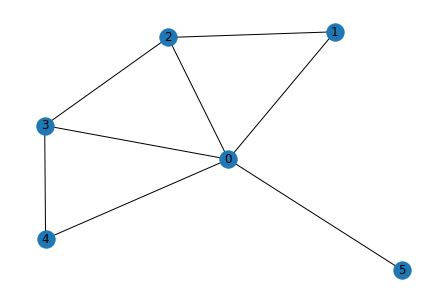

In [77]:
nx.draw(compo, with_labels = True)